In [1]:
import random

In [6]:
def quick_sort(array, l=None, r=None):
    l = 0 if l is None else l
    r = len(array)-1 if r is None else r
    
    if r <= l:
        return
    
    p = random.randint(l, r)
    pivot = array[p]
    array[p], array[r] = array[r], array[p]
    i = j = l
    
    for i in range(l, r):
        if array[i] < pivot:
            array[i], array[j] = array[j], array[i]
            j += 1
    
    array[j], array[r] = array[r], array[j]
    quick_sort(array, l, j-1)
    quick_sort(array, j+1, r)

In [41]:
import time
import tqdm
import numpy as np

In [34]:
def measure_time(func, *args, **kwargs):
    start = time.time()
    func(*args, **kwargs)
    return time.time() - start

In [82]:
Ns = np.geomspace(1e2, 1e6, 50).astype(int)

In [84]:
times = []
for N in tqdm.tqdm_notebook(Ns):
    array = [random.randint(0, 10000000) for _ in range(N)]
    times.append(measure_time(quick_sort, array))

In [85]:
def f(x, a):
    return a*x*np.log(x) 

In [86]:
from scipy.optimize import curve_fit

In [87]:
C = curve_fit(f, Ns[0:25], times[0:25])[0]

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

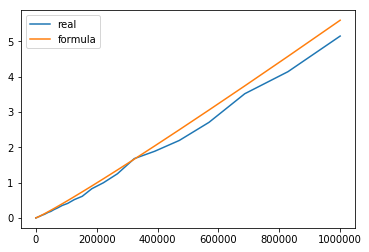

In [89]:
fig, ax = plt.subplots()
ax.plot(Ns, times, label='real')
ax.plot(Ns, f(Ns, C), label='formula')
ax.legend()